# Assignment 6
### Do Question 6, and three more questions of your choice.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.stats import logistic, gaussian_kde, expon, nbinom

### 1. Set review:

- Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

- Plot the following sets: 
    - $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$
    - $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$
    - $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

**Images are included in the GitHub folder as set1, set2, set3 if they aren't visible from the notebook**

Set 1
![Set 1](set1.jpeg)

Set 2
![Set 2](set2.jpeg)

Set 3
![Set 3](set3.jpeg)

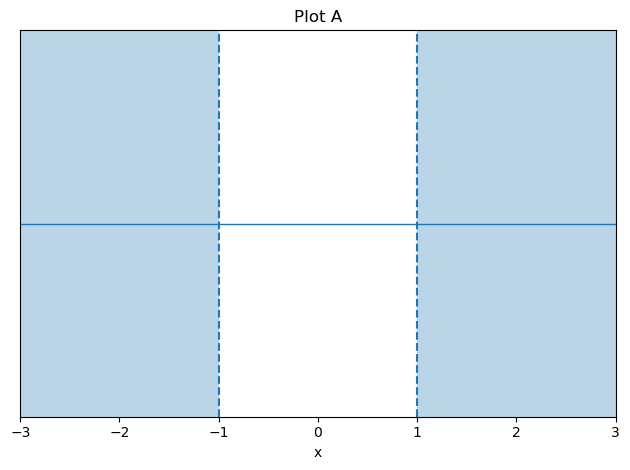

In [6]:
# A

plt.figure()
xmin, xmax = -3, 3
plt.axhline(0, linewidth=1)
plt.axvline(-1, linestyle="--")
plt.axvline(1, linestyle="--")
plt.axvspan(xmin, -1, alpha=0.3)
plt.axvspan(1, xmax, alpha=0.3)
plt.xlim(xmin, xmax)
plt.ylim(-1, 1)
plt.title("Plot A")
plt.yticks([])
plt.xlabel("x")
plt.tight_layout()
plt.show()

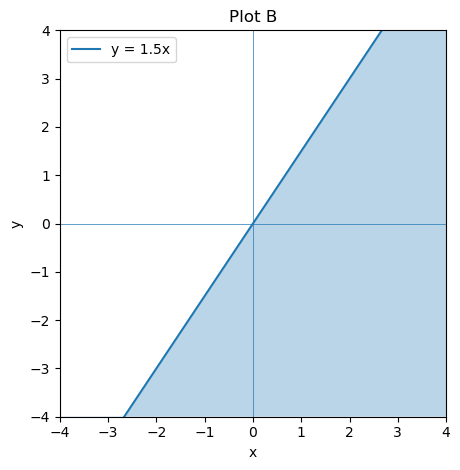

In [7]:
# B

plt.figure()
x = np.linspace(-4, 4, 400)
y_line = 1.5 * x
plt.plot(x, y_line, label="y = 1.5x")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
y_bottom = np.full_like(x, -4.0)
plt.fill_between(x, y_bottom, y_line, alpha=0.3)
plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.gca().set_aspect("equal", adjustable="box")
plt.title("Plot B")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

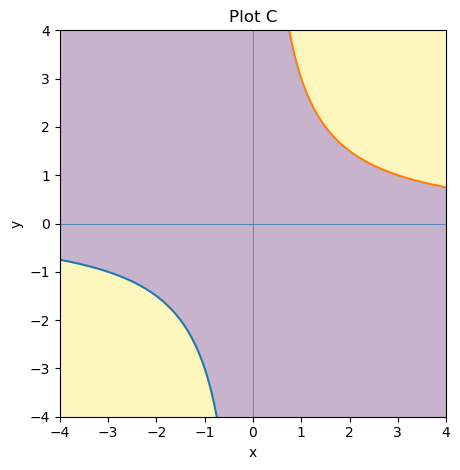

In [8]:
# C

plt.figure()
xmin, xmax, ymin, ymax = -4, 4, -4, 4
xx = np.linspace(xmin, xmax, 800)
yy = np.linspace(ymin, ymax, 800)
X, Y = np.meshgrid(xx, yy)
mask = (X * Y) >= 3 
plt.imshow(mask.T, extent=[xmin, xmax, ymin, ymax], origin="lower", alpha=0.3)
x_left = np.linspace(xmin, -0.1, 400)
x_right = np.linspace(0.1, xmax, 400)
plt.plot(x_left, 3/x_left)
plt.plot(x_right, 3/x_right)

plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
plt.gca().set_aspect("equal", adjustable="box")
plt.title("Plot C")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout()
plt.show()

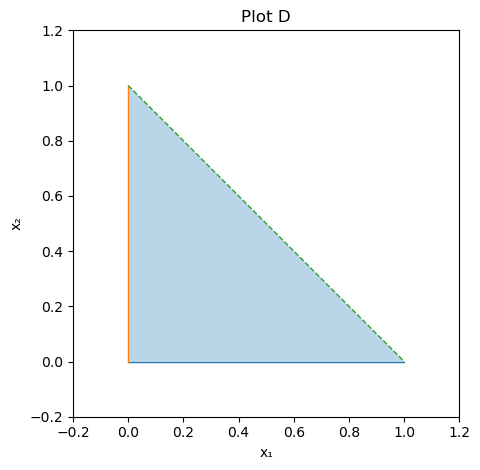

In [9]:
# D

plt.figure()
plt.fill([0, 1, 0], [0, 0, 1], alpha=0.3)
plt.plot([0, 1], [0, 0], linewidth=1)
plt.plot([0, 0], [0, 1], linewidth=1)
plt.plot([0, 1], [1, 0], linewidth=1, linestyle="--")
plt.xlim(-0.2, 1.2); plt.ylim(-0.2, 1.2)
plt.gca().set_aspect("equal", adjustable="box")
plt.title("Plot D")
plt.xlabel("x₁"); plt.ylabel("x₂")
plt.tight_layout()
plt.show()

**Power Set of {1, 2, 3}:**

1. {1}
2. {1, 2}
3. {1, 3}
4. {2, 3}
5. {2}
6. {3}
7. {1, 2, 3}
8. {}

### 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.

**Question 1:**

Outcomes: {1, 2, 3}, 

All Events: 2^3 = 8
        
Event - Probability

    1. {1} - 1/3

    2. {1, 2} - 2/3

    3. {1, 3} - 2/3

    4. {2, 3} - 2/3

    5. {2} - 1/3

    6. {3} - 1/3

    7. {1, 2, 3} - 1

    8. {} - 0

**Question 2:**

Outcomes: [{H,H}, {T,T}, {H, T}, {T, H}]

Set of all events: 2^4 = 16

Event - Probability

1. {HH} - 1/4

2. {HT} - 1/4

3. {TH} - 1/4

4. {TT} - 1/4

5. {HH, HT}  - 2/4

6. {HH, TH} - 2/4

7. {HH, TT} - 2/4 

8. {HT, TH} - 2/4

9. {HT, TT} - 2/4

10. {TH, TT} - 2/4

11. {HH, HT, TH} - 3/4

12. {HT, TH, TT} - 3/4

13. {TH, TT, HH} - 3/4

14. {HH, TT, HT} - 3/4

15. {} - 0

16. {HH, HT, TH, TT} - 1

**Question 3:**

Outcomes: {2,3,4,5,6}

Set of all events: 2^5 = 32

There are 32 total possible events in this situation and each event belongs to the power set of {2,3,4,5,6}. The probabilities of each event is the sum of the individual probabilities that the set consists of. For example, the probability of the event {4,5,6} is [3/9 + 2/9 + 1/9] which is 6/9 or 2/3.



### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.
- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

**Part 1:**

Outcomes: {1,2,3,4,5,6}

Set of all events: 2^6 = 64

There are 64 total possible events in this situation and each event belongs to the power set of {1,2,3,4,5,6}. The probabilities of each event is product of the size of the set and 1/6. For example, the probability of the event {2,4,6} is 3/6 or 1/2.

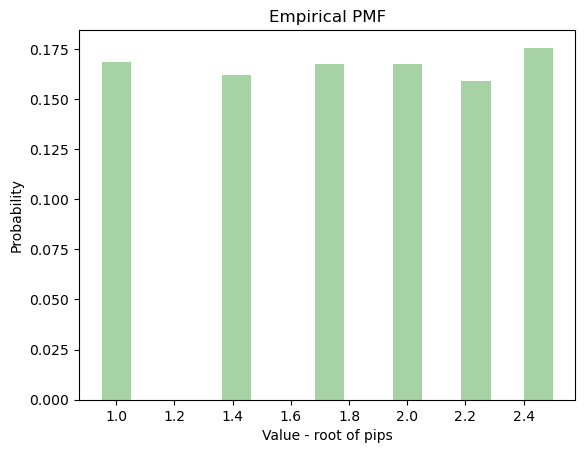

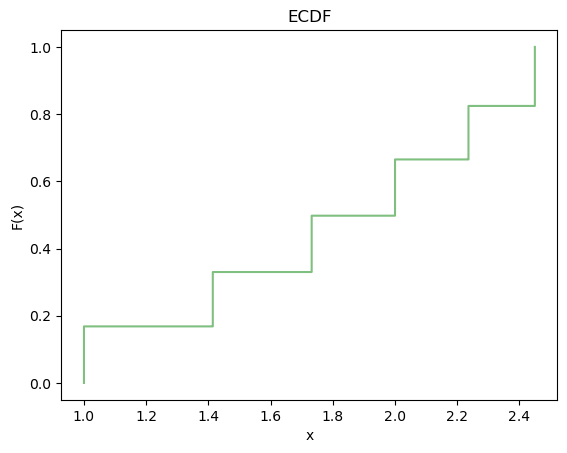

In [17]:
# Part 2:

n = 5000
r = np.random.default_rng(0)
roll = r.integers(1, 7, size=n)
X = np.sqrt(roll) 

vals, counts = np.unique(X, return_counts=True)
probs = counts / n
plt.bar(vals, probs, width = 0.10, color = "g", alpha = 0.35)
plt.xlabel("Value - root of pips")
plt.ylabel("Probability")
plt.title("Empirical PMF")
plt.show()

xs = np.sort(X)
ys = np.arange(1, n+1) / n
plt.step(xs, ys, where="post", color="g", alpha=0.5)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("ECDF")
plt.show()


**Part 3:**

Outcomes: {2,3,4,5,6,7,8,9,10,11,12}

Set of all events: 2^11 = 2048

There are 2048 possible events in this situation and each of them belongs to the power set of {2,3,4,5,6,7,8,9,10,11,12}. The probability of each of these outcomes is the sum of the individual probabilities that the set consists of. For example, the set {4,8,12} has a probability of [3/36 + 5/36 + 1/36] which is 9/36 or 1/4.



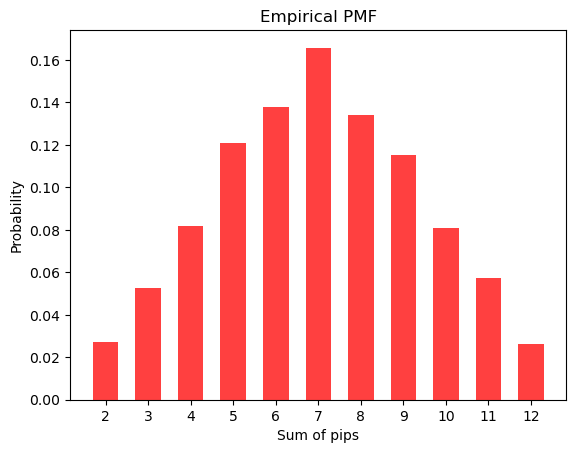

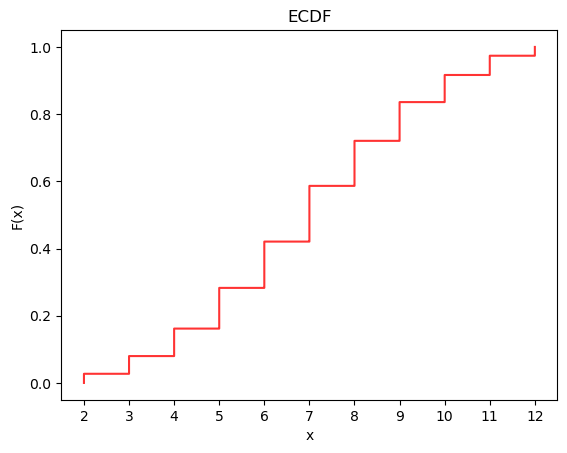

In [19]:
# Part 4:

n = 10000
r = np.random.default_rng(0)
roll1 = r.integers(1, 7, size=n)
roll2 = r.integers(1, 7, size=n)
X = roll1 + roll2 

vals, counts = np.unique(X, return_counts=True)
probs = counts / n
plt.bar(vals, probs, width=0.6, color="r", alpha=0.75)
plt.xticks(np.arange(2, 13))
plt.xlabel("Sum of pips")
plt.ylabel("Probability")
plt.title("Empirical PMF")
plt.show()

xs = np.sort(X)
ys = np.arange(1, n+1) / n
plt.step(xs, ys, where="post", color="r", alpha=0.80)
plt.xticks(np.arange(2, 13))
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("ECDF")
plt.show()


### 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

##

### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


**Part 1:**

Logisitic: (negative infinity, positive infinity)

Exponential: [0, infinity)

Negative Binomial: [0, infinity)

Categorical: {1, 2, ..., K}

In [ ]:
# Part 2:

# Logisitic
x, sigma = sp.symbols('x sigma', positive=True)

F = 1 / (1 + sp.exp(-x/sigma))

f = sp.diff(F, x)
f_simplified = sp.simplify(f)

print("Logistic Original", F)
print("Logistic Derivative", f_simplified)

#Exponential

x, lam = sp.symbols('x lam', positive=True)
F = sp.Piecewise((0, x < 0), (1 - sp.exp(-lam*x), x >= 0))
f = sp.diff(F, x)
f_simplified = sp.simplify(f)

print("Exponential Original: ", F)
print("Exponential Derivative", f_simplified)


Logistic Original 1/(1 + exp(-x/sigma))
LogisticDerivative 1/(4*sigma*cosh(x/(2*sigma))**2)
Exponential Original:  1 - exp(-lam*x)
Exponential Derivative lam*exp(-lam*x)


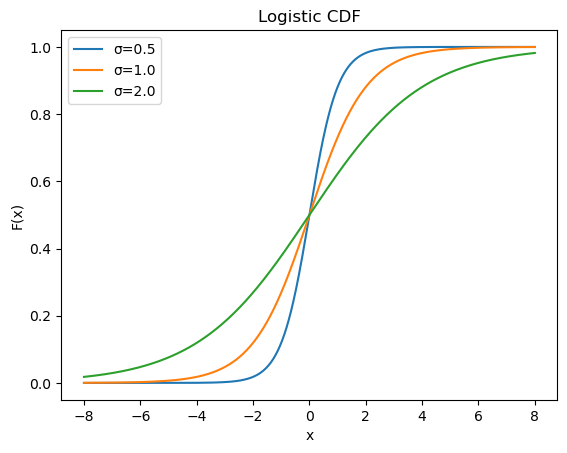

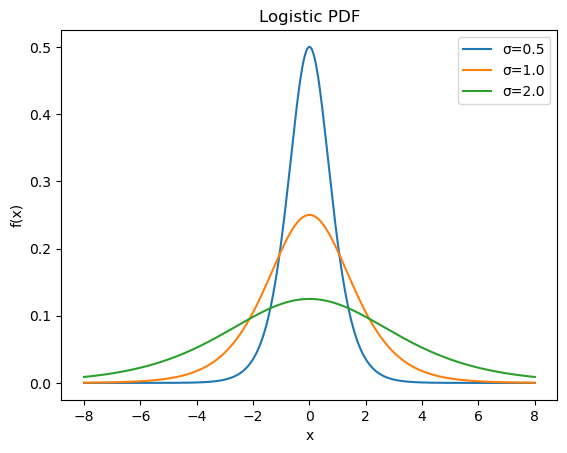

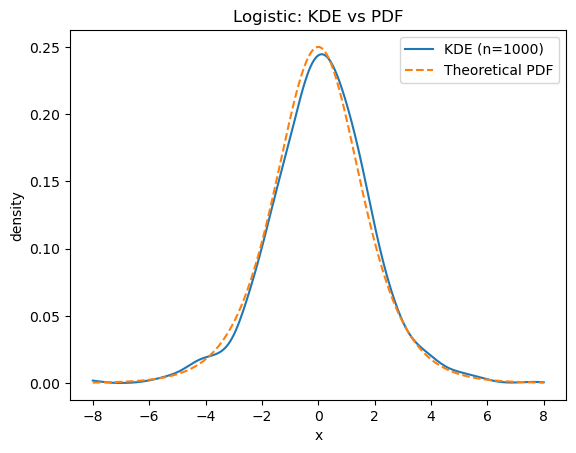

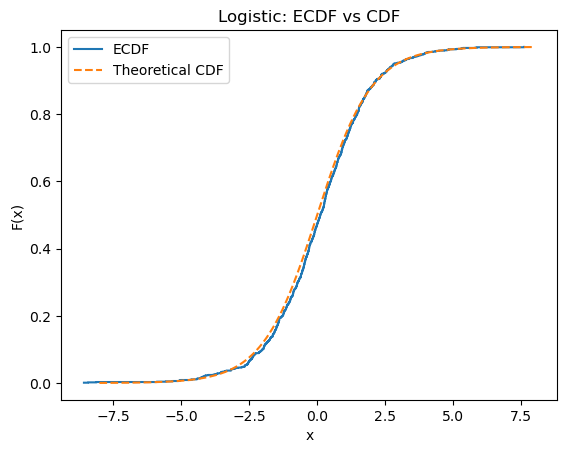

In [ ]:
# Part 3 & 4: Logistic

sigmas = [0.5, 1.0, 2.0]
x = np.linspace(-8, 8, 800)

plt.figure()
for s in sigmas: plt.plot(x, logistic.cdf(x, scale=s), label=f"σ={s}")
plt.legend()
plt.title("Logistic CDF")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

plt.figure()
for s in sigmas: plt.plot(x, logistic.pdf(x, scale=s), label=f"σ={s}")
plt.legend()
plt.title("Logistic PDF")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

r = np.random.default_rng(0)
sample = logistic.rvs(scale=1.0, size=1000, random_state=r)

kde = gaussian_kde(sample)
plt.figure()
plt.plot(x, kde(x), label="KDE (n=1000)")
plt.plot(x, logistic.pdf(x, scale=1.0), "--", label="Theoretical PDF")
plt.legend()
plt.title("Logistic: KDE vs PDF")
plt.xlabel("x")
plt.ylabel("density")
plt.show()

xs = np.sort(sample); ys = np.arange(1, len(sample)+1)/len(sample)
plt.figure()
plt.step(xs, ys, where="post", label="ECDF")
plt.plot(x, logistic.cdf(x, scale=1.0), "--", label="Theoretical CDF")
plt.legend()
plt.title("Logistic: ECDF vs CDF")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()


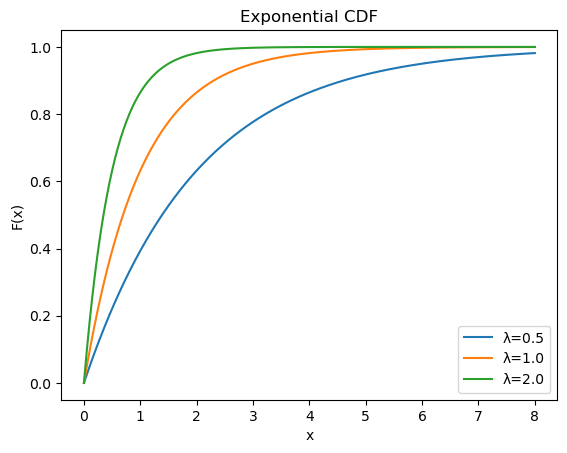

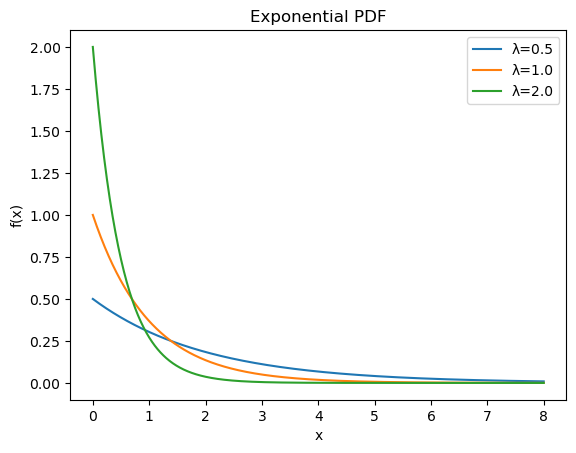

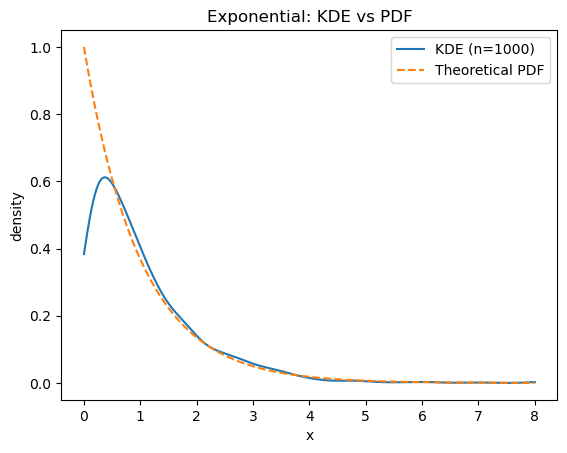

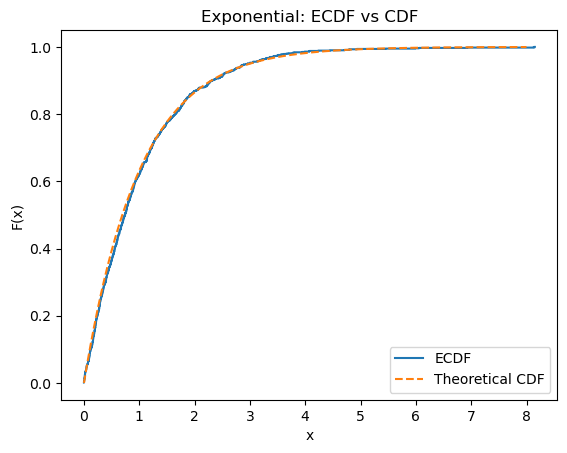

In [ ]:
# Part 3 & 4: Exponential

lambdas = [0.5, 1.0, 2.0]
x = np.linspace(0, 8, 800)

plt.figure()
for lam in lambdas:
    plt.plot(x, expon.cdf(x, scale=1/lam), label=f"λ={lam}")
plt.legend()
plt.title("Exponential CDF")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

plt.figure()
for lam in lambdas:
    plt.plot(x, expon.pdf(x, scale=1/lam), label=f"λ={lam}")
plt.legend()
plt.title("Exponential PDF")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

r = np.random.default_rng(0)
sample = expon.rvs(scale=1.0, size=1000, random_state=r)

kde = gaussian_kde(sample)
plt.figure()
plt.plot(x, kde(x), label="KDE (n=1000)")
plt.plot(x, expon.pdf(x, scale=1.0), "--", label="Theoretical PDF")
plt.legend()
plt.title("Exponential: KDE vs PDF")
plt.xlabel("x")
plt.ylabel("density")
plt.show()

xs = np.sort(sample)
ys = np.arange(1, len(sample)+1) / len(sample)
plt.figure()
plt.step(xs, ys, where="post", label="ECDF")
plt.plot(x, expon.cdf(x, scale=1.0), "--", label="Theoretical CDF")
plt.legend()
plt.title("Exponential: ECDF vs CDF")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()


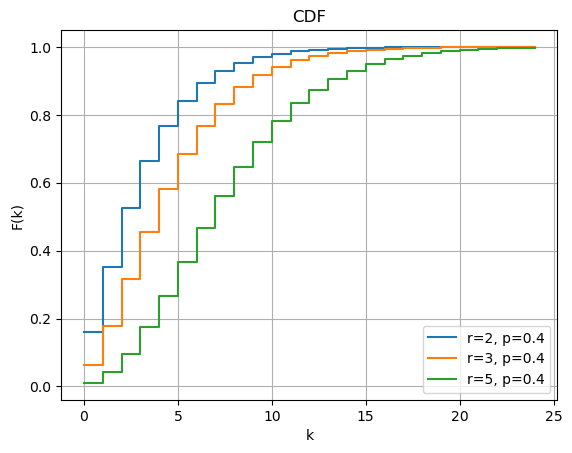

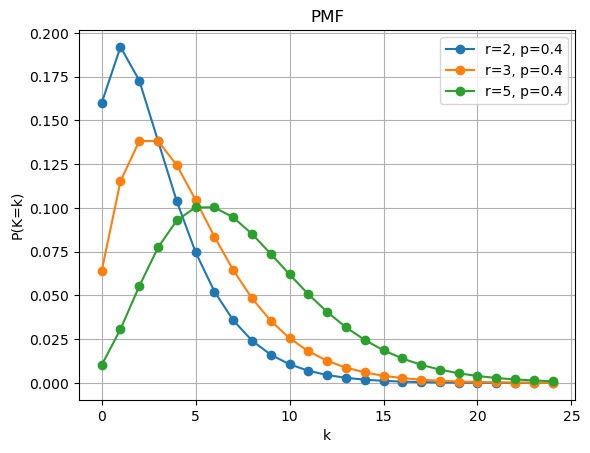

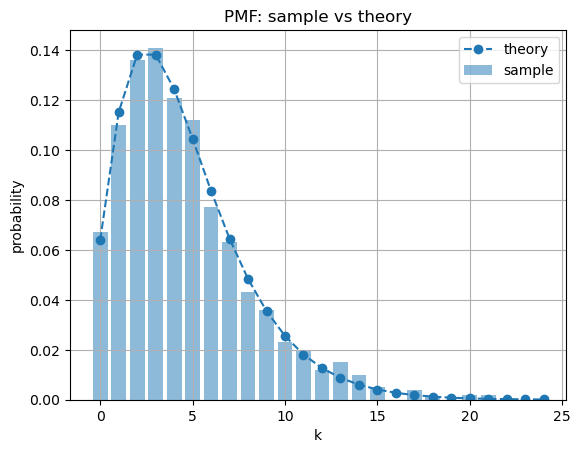

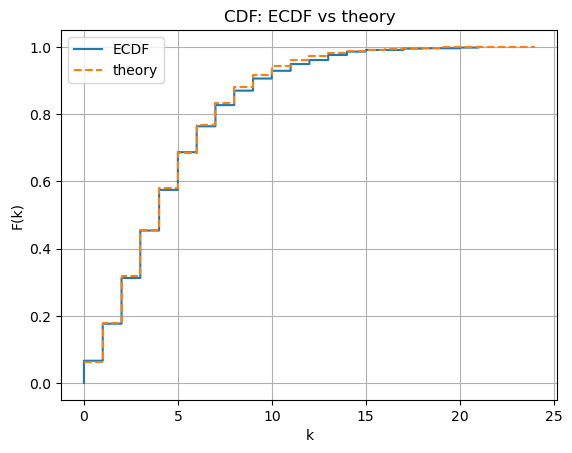

In [31]:
# Part 3 & 4: Negative Binomial

params = [(2, 0.4), (3, 0.4), (5, 0.4)]
k = np.arange(0, 25)

plt.figure()
for r_, p_ in params:
    plt.step(k, nbinom.cdf(k, r_, p_), where="post", label=f"r={r_}, p={p_}")
plt.legend()
plt.title("CDF")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.grid(True)
plt.show()

plt.figure()
for r_, p_ in params:
    plt.plot(k, nbinom.pmf(k, r_, p_), marker="o", linestyle="-", label=f"r={r_}, p={p_}")
plt.legend()
plt.title("PMF")
plt.xlabel("k")
plt.ylabel("P(K=k)")
plt.grid(True)
plt.show()

r = np.random.default_rng(0)
r_sim, p_sim = 3, 0.4
sample = nbinom.rvs(r_sim, p_sim, size=1000, random_state=r)

vals, counts = np.unique(sample, return_counts=True)
probs = counts / 1000

plt.figure()
plt.bar(vals, probs, width=0.8, alpha=0.5, label="sample")
plt.plot(k, nbinom.pmf(k, r_sim, p_sim), "o--", label="theory")
plt.title("PMF: sample vs theory")
plt.xlabel("k")
plt.ylabel("probability")
plt.legend()
plt.grid(True)
plt.show()

xs = np.sort(sample)
ys = np.arange(1, len(sample) + 1) / len(sample)

plt.figure()
plt.step(xs, ys, where="post", label="ECDF")
plt.step(k, nbinom.cdf(k, r_sim, p_sim), where="post", linestyle="--", label="theory")
plt.title("CDF: ECDF vs theory")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.legend()
plt.grid(True)
plt.show()


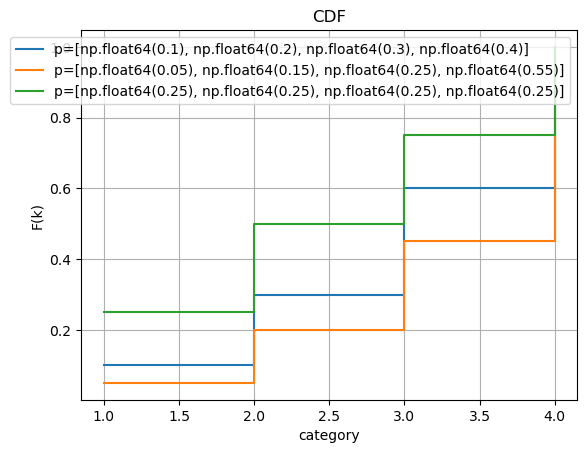

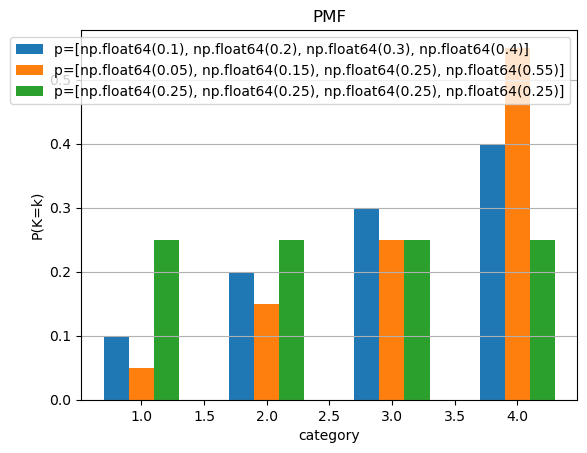

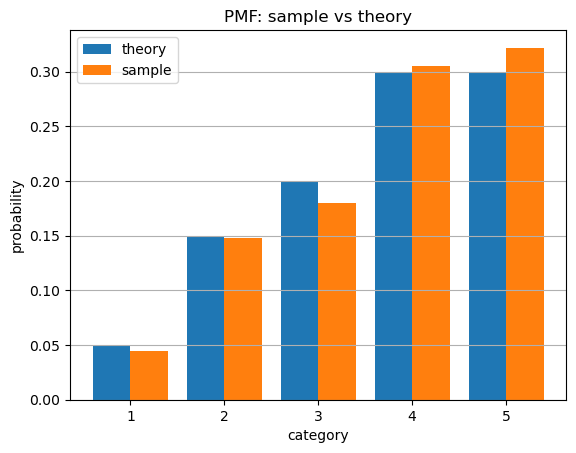

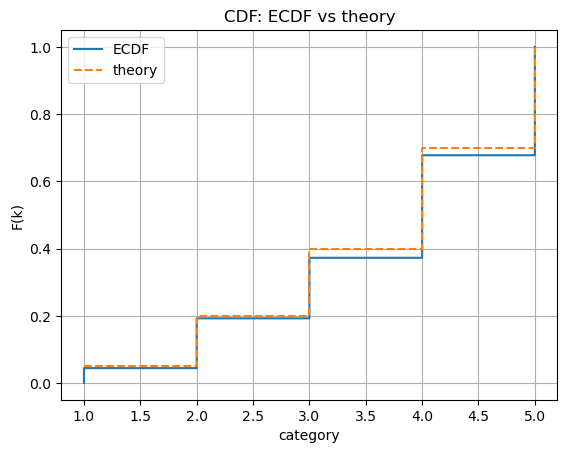

In [ ]:
# Part 3 & 4: Categorical

ps = [
    np.array([0.1, 0.2, 0.3, 0.4]),
    np.array([0.05, 0.15, 0.25, 0.55]),
    np.array([0.25, 0.25, 0.25, 0.25])
]
k = np.arange(1, len(ps[0]) + 1)

plt.figure()
for p in ps:
    plt.step(k, np.cumsum(p), where="post", label=f"p={list(p)}")
plt.legend()
plt.title("CDF")
plt.xlabel("category")
plt.ylabel("F(k)")
plt.grid(True)
plt.show()

plt.figure()
offsets = np.linspace(-0.2, 0.2, len(ps))
for off, p in zip(offsets, ps):
    plt.bar(k + off, p, width=0.2, label=f"p={list(p)}")
plt.legend()
plt.title("PMF")
plt.xlabel("category")
plt.ylabel("P(K=k)")
plt.grid(True, axis="y")
plt.show()

r = np.random.default_rng(0)
p = np.array([0.05, 0.15, 0.2, 0.3, 0.3])
categories = np.arange(1, len(p) + 1)
sample = r.choice(categories, size=1000, p=p)

vals, counts = np.unique(sample, return_counts=True)
probs = counts / 1000

plt.figure()
plt.bar(categories - 0.2, p, width=0.4, label="theory")
plt.bar(vals + 0.2, probs, width=0.4, label="sample")
plt.title("PMF: sample vs theory")
plt.xlabel("category")
plt.ylabel("probability")
plt.legend()
plt.grid(True, axis="y")
plt.show()

xs = np.sort(sample)
ys = np.arange(1, len(sample) + 1) / len(sample)
theory_cdf = np.cumsum(p)

plt.figure()
plt.step(xs, ys, where="post", label="ECDF")
plt.step(categories, theory_cdf, where="post", linestyle="--", label="theory")
plt.title("CDF: ECDF vs theory")
plt.xlabel("category")
plt.ylabel("F(k)")
plt.legend()
plt.grid(True)
plt.show()


**Part 5:**

1. Logisitic: In this dataset, Age is probably the most logsitic variable since it is usually relatively normal. However, it doesn't have negative values.

2. Exponential: The Overall Survival variable has a similar distribution because survival is typically exponential, and in this case it is.

3. Negative Binomial: I honestly don't know if there is one that has a similar distribution, but my best guess is the lymph nodes variable because it has a long right tail.

4. Categorical: The Tumor Stage variable has a similar distribution because they are distinct and mutually exclusive categories.